# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Url and units
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city

#List for holdings
record = 0
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#Loop through the cities and data request
print("Beginning Data Retrieval")
print("-----------------------------")
record = 0
set = 1
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record} of Set {set}: {city}') 
        city_name.append(city_json['name'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        cloudiness.append(city_json['clouds']['all'])
        windspeed.append(city_json['wind']['speed'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
    else:
        print('City not found. Skipping...')
#     # this if statement will limit the amount of cities checked, use to avoid running all 500+ cities
#     if record >= 100:
#         break
    # sleep timer to prevent bandwidth maxing for API
    time.sleep(1)
    if record == 50:
        record = 0
        set = set + 1

#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Humidity':humidity,
                'Cloudiness':cloudiness,
                'Wind Speed':windspeed,
                'Country':country,
                'Date':date
                }

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1: albany
Processing Record 2 of Set 1: cape town
Processing Record 3 of Set 1: punta arenas
Processing Record 4 of Set 1: tura
Processing Record 5 of Set 1: jamestown
Processing Record 6 of Set 1: at-bashi
Processing Record 7 of Set 1: saint george
Processing Record 8 of Set 1: kavieng
Processing Record 9 of Set 1: klaksvik
Processing Record 10 of Set 1: ribeira grande
Processing Record 11 of Set 1: greeley
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1: yellowknife
Processing Record 15 of Set 1: salta
Processing Record 16 of Set 1: nikolskoye
City not found. Skipping...
Processing Record 18 of Set 1: griffith
Processing Record 19 of Set 1: harnosand
Processing Record 20 of Set 1: hun
Processing Record 21 of Set 1: chokurdakh
Processing Record 22 of Set 1: castro
Processing Record 23 of Set 1: fortuna
Processing Record 24 of Set 1: ushuaia
Processing Record 25 of Se

City not found. Skipping...
Processing Record 10 of Set 5: kaitangata
Processing Record 11 of Set 5: provideniya
Processing Record 12 of Set 5: bandarbeyla
Processing Record 13 of Set 5: soto la marina
Processing Record 14 of Set 5: kudahuvadhoo
Processing Record 15 of Set 5: juneau
Processing Record 16 of Set 5: pitanga
Processing Record 17 of Set 5: bandundu
Processing Record 18 of Set 5: flinders
Processing Record 19 of Set 5: houma
Processing Record 20 of Set 5: aklavik
Processing Record 21 of Set 5: ranong
Processing Record 22 of Set 5: san juan
Processing Record 23 of Set 5: causapscal
Processing Record 24 of Set 5: nurlat
City not found. Skipping...
Processing Record 26 of Set 5: vernon
Processing Record 27 of Set 5: lompoc
Processing Record 28 of Set 5: fairbanks
Processing Record 29 of Set 5: nabire
Processing Record 30 of Set 5: birjand
Processing Record 31 of Set 5: la ronge
Processing Record 32 of Set 5: hobart
Processing Record 33 of Set 5: zhezkazgan
Processing Record 34 

Processing Record 19 of Set 9: palmas
Processing Record 20 of Set 9: bac lieu
City not found. Skipping...
Processing Record 22 of Set 9: genhe
Processing Record 23 of Set 9: anuchino
Processing Record 24 of Set 9: maningrida
Processing Record 25 of Set 9: tadine
Processing Record 26 of Set 9: codrington
Processing Record 27 of Set 9: el cope
Processing Record 28 of Set 9: blagoveshchenka
Processing Record 29 of Set 9: moquegua
Processing Record 30 of Set 9: baruun-urt
City not found. Skipping...
Processing Record 32 of Set 9: muravlenko
Processing Record 33 of Set 9: lagoa
Processing Record 34 of Set 9: narsaq
Processing Record 35 of Set 9: moctezuma
Processing Record 36 of Set 9: eruwa
Processing Record 37 of Set 9: talakan
Processing Record 38 of Set 9: laguna
Processing Record 39 of Set 9: tsiroanomandidy
Processing Record 40 of Set 9: vanavara
Processing Record 41 of Set 9: kem
Processing Record 42 of Set 9: jiuquan
Processing Record 43 of Set 9: thompson
Processing Record 44 of Se

In [15]:
#length of latitude and temprature
len(lat)
len(max_temp)

543

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [17]:
# Convert "Date" column to "datetime64" datatype
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Convert numeric columns to "float64" datatype
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Lng"] = pd.to_numeric(weather_df["Lng"])
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

# Write into CSV file
weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,46.99,90,100,3.58,US,1970-01-01 00:00:01.603938562
1,Cape Town,-33.93,18.42,61.00,87,75,17.22,ZA,1970-01-01 00:00:01.603938537
2,Punta Arenas,-53.15,-70.92,46.40,65,40,34.45,CL,1970-01-01 00:00:01.603938562
3,Tura,25.52,90.22,80.22,73,0,1.10,IN,1970-01-01 00:00:01.603938626
4,Jamestown,42.10,-79.24,43.00,86,1,8.05,US,1970-01-01 00:00:01.603938572
...,...,...,...,...,...,...,...,...,...
538,Lebu,-37.62,-73.65,48.60,76,0,20.71,CL,1970-01-01 00:00:01.603939498
539,Kavaratti,10.57,72.64,81.99,73,56,5.14,IN,1970-01-01 00:00:01.603939279
540,Garoowe,8.41,48.48,73.56,73,43,5.48,SO,1970-01-01 00:00:01.603939500
541,Wick,58.43,-3.08,44.60,87,63,6.93,GB,1970-01-01 00:00:01.603939501


In [18]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.337366,16.211934,57.644512,73.970534,52.042357,7.452118
std,33.958011,92.130680,21.527547,19.937426,40.083861,5.663277
min,-54.800000,-175.200000,-6.360000,1.000000,0.000000,0.180000
25%,-8.885000,-66.525000,42.700000,65.500000,2.000000,3.335000
50%,22.890000,18.400000,61.810000,79.000000,56.000000,5.990000
75%,49.335000,98.905000,75.350000,88.000000,92.000000,10.290000
max,78.220000,179.320000,98.600000,100.000000,100.000000,43.730000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_clean_data = weather_df.loc[weather_df["Humidity"] < 100]

In [22]:
len(weather_df)

543

In [23]:
city_clean_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,18.781082,18.075901,57.566129,73.180266,51.785579,7.475370
std,34.205656,92.223040,21.668824,19.706780,40.301449,5.674524
min,-54.800000,-175.200000,-6.360000,1.000000,0.000000,0.180000
25%,-9.730000,-64.500000,42.135000,65.000000,1.500000,3.310000
50%,22.080000,19.770000,61.810000,78.000000,56.000000,6.020000
75%,49.880000,100.660000,75.350000,88.000000,92.500000,10.290000
max,78.220000,179.320000,98.600000,99.000000,100.000000,43.730000


In [24]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [25]:
city_clean_data = weather_df
for x in over_100:
    city_clean_data = weather_df.drop([x])
city_clean_data = weather_df
for x in over_100:
    city_clean_data = weather_df.drop([x])
city_clean_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,46.99,90,100,3.58,US,1970-01-01 00:00:01.603938562
1,Cape Town,-33.93,18.42,61.00,87,75,17.22,ZA,1970-01-01 00:00:01.603938537
2,Punta Arenas,-53.15,-70.92,46.40,65,40,34.45,CL,1970-01-01 00:00:01.603938562
3,Tura,25.52,90.22,80.22,73,0,1.10,IN,1970-01-01 00:00:01.603938626
4,Jamestown,42.10,-79.24,43.00,86,1,8.05,US,1970-01-01 00:00:01.603938572
...,...,...,...,...,...,...,...,...,...
538,Lebu,-37.62,-73.65,48.60,76,0,20.71,CL,1970-01-01 00:00:01.603939498
539,Kavaratti,10.57,72.64,81.99,73,56,5.14,IN,1970-01-01 00:00:01.603939279
540,Garoowe,8.41,48.48,73.56,73,43,5.48,SO,1970-01-01 00:00:01.603939500
541,Wick,58.43,-3.08,44.60,87,63,6.93,GB,1970-01-01 00:00:01.603939501


In [26]:
lat = city_clean_data .Lat
max_temp = city_clean_data ["Max Temp"]
humid = city_clean_data.Humidity
cloud = city_clean_data.Cloudiness
wind = city_clean_data['Wind Speed']

# Export the clean_city_data into a csv:
city_clean_data.to_csv("../output_data/city_clean_data.csv", index=False, header=True)

In [27]:
city_clean_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.337366,16.211934,57.644512,73.970534,52.042357,7.452118
std,33.958011,92.130680,21.527547,19.937426,40.083861,5.663277
min,-54.800000,-175.200000,-6.360000,1.000000,0.000000,0.180000
25%,-8.885000,-66.525000,42.700000,65.500000,2.000000,3.335000
50%,22.890000,18.400000,61.810000,79.000000,56.000000,5.990000
75%,49.335000,98.905000,75.350000,88.000000,92.000000,10.290000
max,78.220000,179.320000,98.600000,100.000000,100.000000,43.730000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

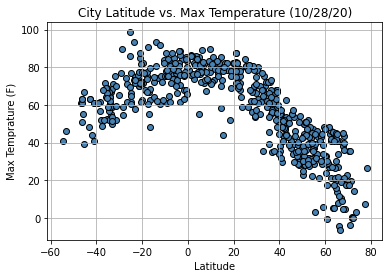

In [28]:
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

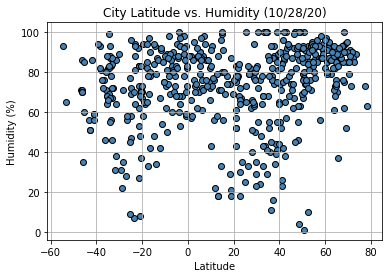

In [29]:
#Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

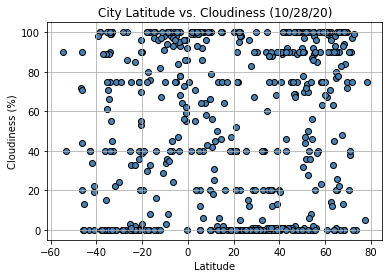

In [30]:
#Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

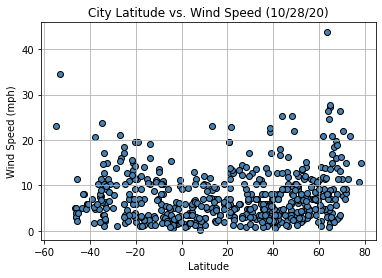

In [31]:
#Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [32]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

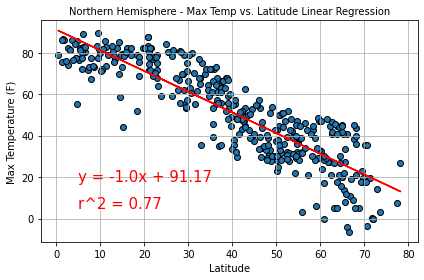

In [33]:
#The x and y axis values
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']

#Regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

#Scatter plot with the linear regression line
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")

#linear regression equation and r squared
plt.annotate(line_eq, xy=(5,18),fontsize=15,color='red')
plt.annotate(r_squared, (5,5),fontsize=15,color="red")

plt.grid()
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',size=10)

plt.xlabel('Latitude',size=10)
plt.ylabel('Max Temperature (F)',size=10)

plt.tight_layout()
plt.savefig("output_data/Northern_Hemisphere_max_temp_v._lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

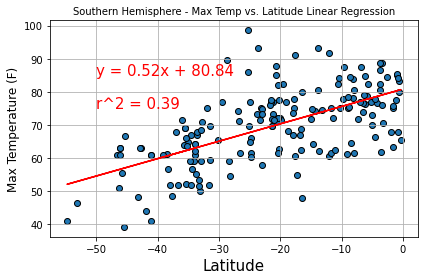

In [34]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']

#the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

#the scattor plot with the linear regression line
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")

#displaying the linear regression equation and r squared
plt.annotate(line_eq, xy=(-50,85),fontsize=15,color='red')
plt.annotate(r_squared, (-50,75),fontsize=15,color="red")

plt.grid()
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',size=10)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=12)

#Display and save
plt.tight_layout()
plt.savefig("output_data/southern_hemisphere_max_temp_v.lat.png")
plt.show()

###This plot shows the relationship between latitude and temperature in the selected cities. A trend is shown where the closer a city is to the equator, and the higher the max temperature. As you move away from the equator, the max temperature gradually decreases, with cities above the equator showing a marginally larger decrease.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

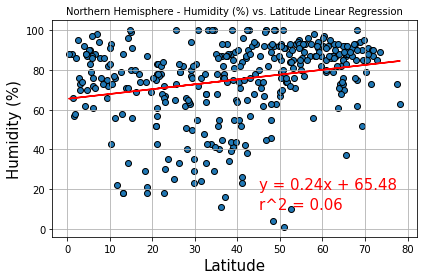

In [36]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']

#the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

#the scattor plot with the linear regression line
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")

#displaying the linear regression equation and r squared
plt.annotate(line_eq, xy=(45,20),fontsize=15,color='red')
plt.annotate(r_squared, (45,10),fontsize=15,color="red")

plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',size=10)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)

#Display and save
plt.tight_layout()
plt.savefig("output_data/nouthern_hemisphere_humidity_temp_v.lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

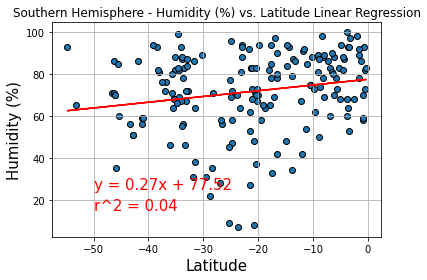

In [37]:
#setup linear regression and line equation 
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']

#regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")

#linear regression equation and r squared
plt.annotate(line_eq, xy=(-50,25),fontsize=15,color='red')
plt.annotate(r_squared, (-50,15),fontsize=15,color="red")

plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',size=12)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)

#Display and save the plot
plt.tight_layout()
plt.savefig("output_data/southern_hemisphere_humidity_v._lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


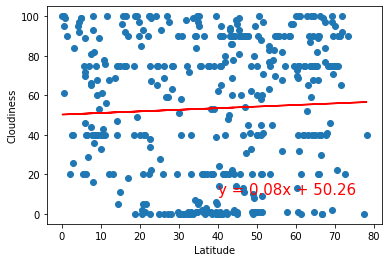

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


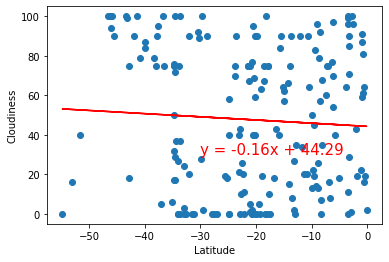

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


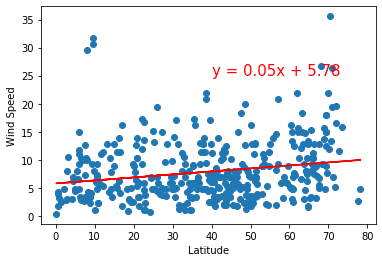

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


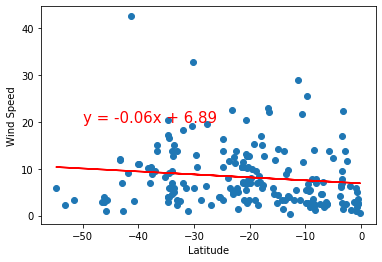